In [3]:
import pandas as pd
import numpy as np

In [5]:
X = pd.read_csv('linearX.csv', header=None).values.flatten()
y = pd.read_csv('linearY.csv', header=None).values.flatten()

X = (X - np.mean(X)) / np.std(X)

In [7]:
def hypothesis(theta_0, theta_1, x):
    return theta_0 + theta_1 * x


In [9]:
def cost_function(theta_0, theta_1, X, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(theta_0, theta_1, X) - y) ** 2)

In [11]:
def gradient_descent(X, y, alpha, iterations):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute gradients
        error = hypothesis(theta_0, theta_1, X) - y
        grad_theta_0 = (1 / m) * np.sum(error)
        grad_theta_1 = (1 / m) * np.sum(error * X)

        # Update parameters
        theta_0 -= alpha * grad_theta_0
        theta_1 -= alpha * grad_theta_1

        # Store cost
        cost_history.append(cost_function(theta_0, theta_1, X, y))
    
    return theta_0, theta_1, cost_history

In [13]:
alpha = 0.01  # Learning rate
iterations = 1000

theta_0, theta_1, cost_history = gradient_descent(X, y, alpha, iterations)

print(f"Theta_0: {theta_0}, Theta_1: {theta_1}")


Theta_0: 0.9965770746670886, Theta_1: 0.0013401381605770857


In [15]:
def predict(x, theta_0, theta_1):
    return hypothesis(theta_0, theta_1, x)


x_new = 0.5
y_pred = predict(x_new, theta_0, theta_1)
print(f"Predicted value for x={x_new}: {y_pred}")

Predicted value for x=0.5: 0.9972471437473771


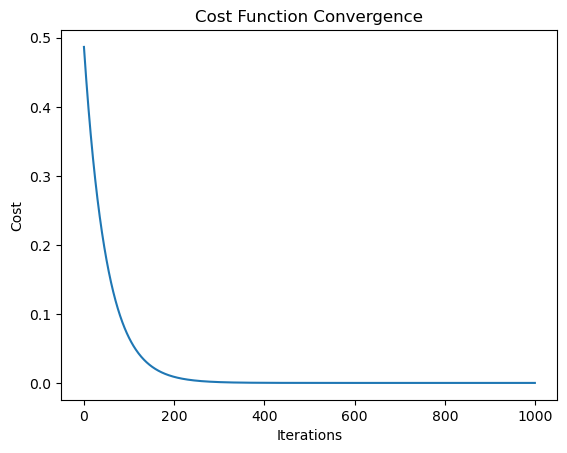

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


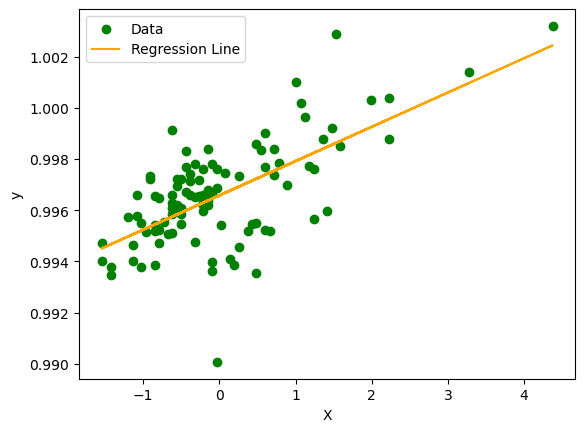

In [19]:
plt.scatter(X, y, color='green', label='Data')
plt.plot(X, hypothesis(theta_0, theta_1, X), color='orange', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

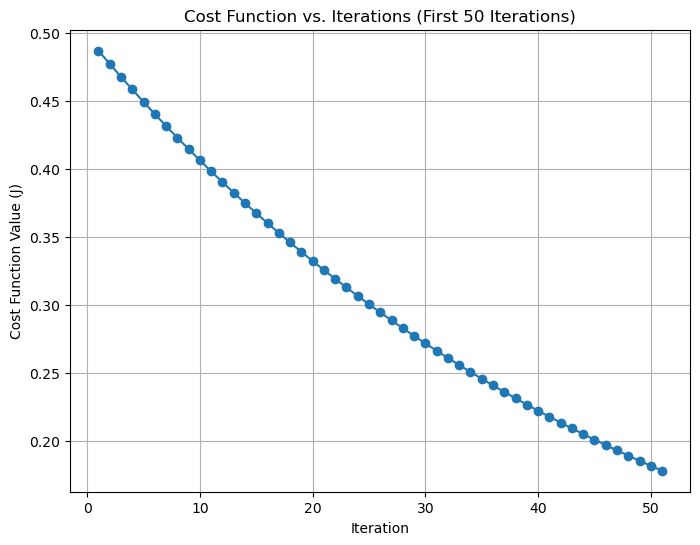

In [21]:
plt.figure(figsize=(8, 6))

# Ensure x and y have the same length
iterations = range(1, min(51, len(cost_history)) + 1)  # First 50 iterations or less
cost_values = cost_history[:len(iterations)]          # Matching cost values

# Plot
plt.plot(iterations, cost_values, marker='o')
plt.title("Cost Function vs. Iterations (First 50 Iterations)")
plt.xlabel("Iteration")
plt.ylabel("Cost Function Value (J)")
plt.grid(True)
plt.show()